In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as py

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [2]:
# Duplicate observations from the minority class
def upsample(df, target):
    print('Upsampling data...')
    majority = df[df[target] == 1]
    minority = df[df[target] == 0]
    minority_upsampled = resample(minority, replace=True,  # sample with replacement
                         n_samples=len(majority),  # to match majority class
                         random_state=123)  # reproducible results
    upsampled = pd.concat([majority, minority_upsampled])
    return upsampled

# Duplicate observations from the majority class
def downsample(df, target):
    print('Downsampling data...')
    majority = df[df[target] == 1]
    minority = df[df[target] == 0]
    majority_downsampled = resample(majority, replace=False,  # sample without replacement
                         n_samples=len(minority),  # to match minority class
                         random_state=123)  # reproducible results
    downsampled = pd.concat([majority_downsampled, minority])
    return downsampled
    
def logistic_regression(df, target):
    y = df[target]
    x = df.drop([target], axis=1)
    clf = LogisticRegression(solver='liblinear').fit(x, y)
    pred_y = clf.predict(x)
 
    print('Logistic Regression Accuracy: ', accuracy_score(y, pred_y) )
    
def random_forest(x_train, y_train, x_test, y_test):
    # Train model
    clf = RandomForestClassifier(n_estimators=100)
    clf.fit(x_train, y_train)
 
    # Predict on test set
    pred_y = clf.predict(x_test)
    print('Random Forest Accuracy: ', accuracy_score(y_test, pred_y) )

In [3]:
target = 'Going_to_Walk'

df = pd.read_csv("data_files/Patients_hourly_data.csv")
df = df.drop(['Date'], axis = 1) # get rid of date column
y = df[target]
x = df.drop([target], axis=1)
print("Going to Walk value count:")
print( df[target].value_counts())

Going to Walk value count:
1    10112
0      723
Name: Going_to_Walk, dtype: int64


In [4]:
df_upsampled = upsample(df, target)
logistic_regression(df_upsampled, target)
df_downsampled = downsample(df, target)
logistic_regression(df_downsampled, target)

Upsampling data...
Logistic Regression Accuracy:  0.6376582278481012
Downsampling data...
Logistic Regression Accuracy:  0.6210235131396957


In [5]:
def auc(df, x, y):
    clf = LogisticRegression(solver='lbfgs').fit(x, y)
    
    # Predict class probabilities
    prob_y = clf.predict_proba(x)
    
    # Keep only the positive class
    prob_y = [p[1] for p in prob_y]
    
    print( roc_auc_score(y, prob_y) )

auc(df, x, y)

0.4956801937251607


C:\Users\chang\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [6]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% training and 30% test
random_forest(x_train, y_train, x_test, y_test)

Random Forest Accuracy:  0.9277145493694248


C:\Users\chang\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.495


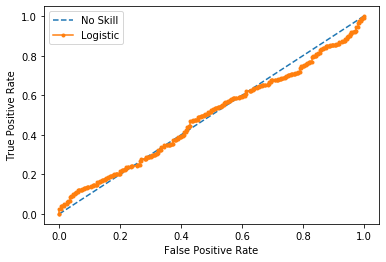

In [11]:
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(x_train, y_train)
# generate a no skill prediction (majority class)
ns_probs = [1 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 0]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()